In [1]:
cd C:\Users\home\Documents\project\Bharat_Intern


C:\Users\home\Documents\project\Bharat_Intern


# Bharat Intern Machine Learning Internship

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


1.Wine quality prediction
-->In this we use the dataset from the internet and try to predict quality of a wine from the previous data provided in the datasets..

In [3]:
 #it is an array processing package and it provides tools for handling n-dimensional and is also used in scientific calculation
import numpy as np
#pandas is python package that offers various data structures and is also used for manipulating numerical data
import pandas as pd
#it is a visualization package of Python and is mainly used in data science and data analytics fields
import matplotlib.pyplot as plt,seaborn as sns
#here for splitting the dataset into train and test we use a train_test_split class from a module called model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
#here we are importing the support vector classifier from the support vector machine for classification purpose
from sklearn.svm import SVC
from xgboost import XGBClassifier
#here we are importing LogisticRegression and LinearRegression for classification purposes
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#here we are loadind the 
wine_quality_datasets=pd.read_csv('wineQT.csv')
print(wine_quality_datasets.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [5]:
print(wine_quality_datasets.tail())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0      

In [6]:
#here this line will give which type of data the columns contain
wine_quality_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
#here it will descriptive statistical measures
wine_quality_datasets.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Exploratory Dta Analysis(EDA)
EDA means it is an approanch to analysing the data using visual techniques

In [8]:
wine_quality_datasets.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
#here we are replacing each columns null values into mean values 
for col in wine_quality_datasets:
    if wine_quality_datasets[col].isnull().sum()>0:
        wine_quality_datasets[col]=wine_quality_datasets[col].fillna(wine_quality_datasets[col].mean())
        


# Data visualisation for continous data

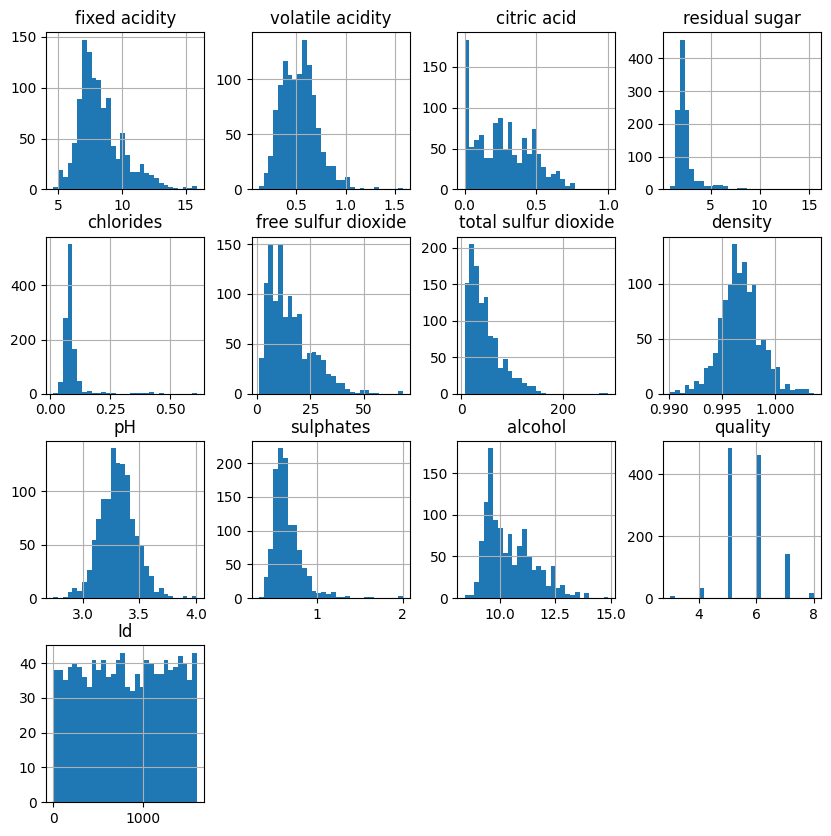

In [10]:
wine_quality_datasets.hist(bins=30,figsize=(10,10))
plt.show()        

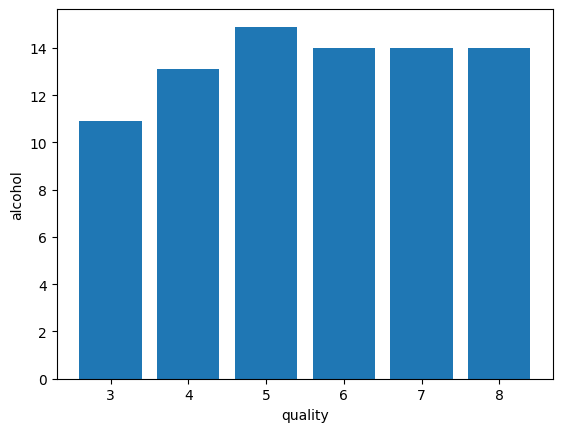

In [11]:
plt.bar(wine_quality_datasets['quality'],wine_quality_datasets['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

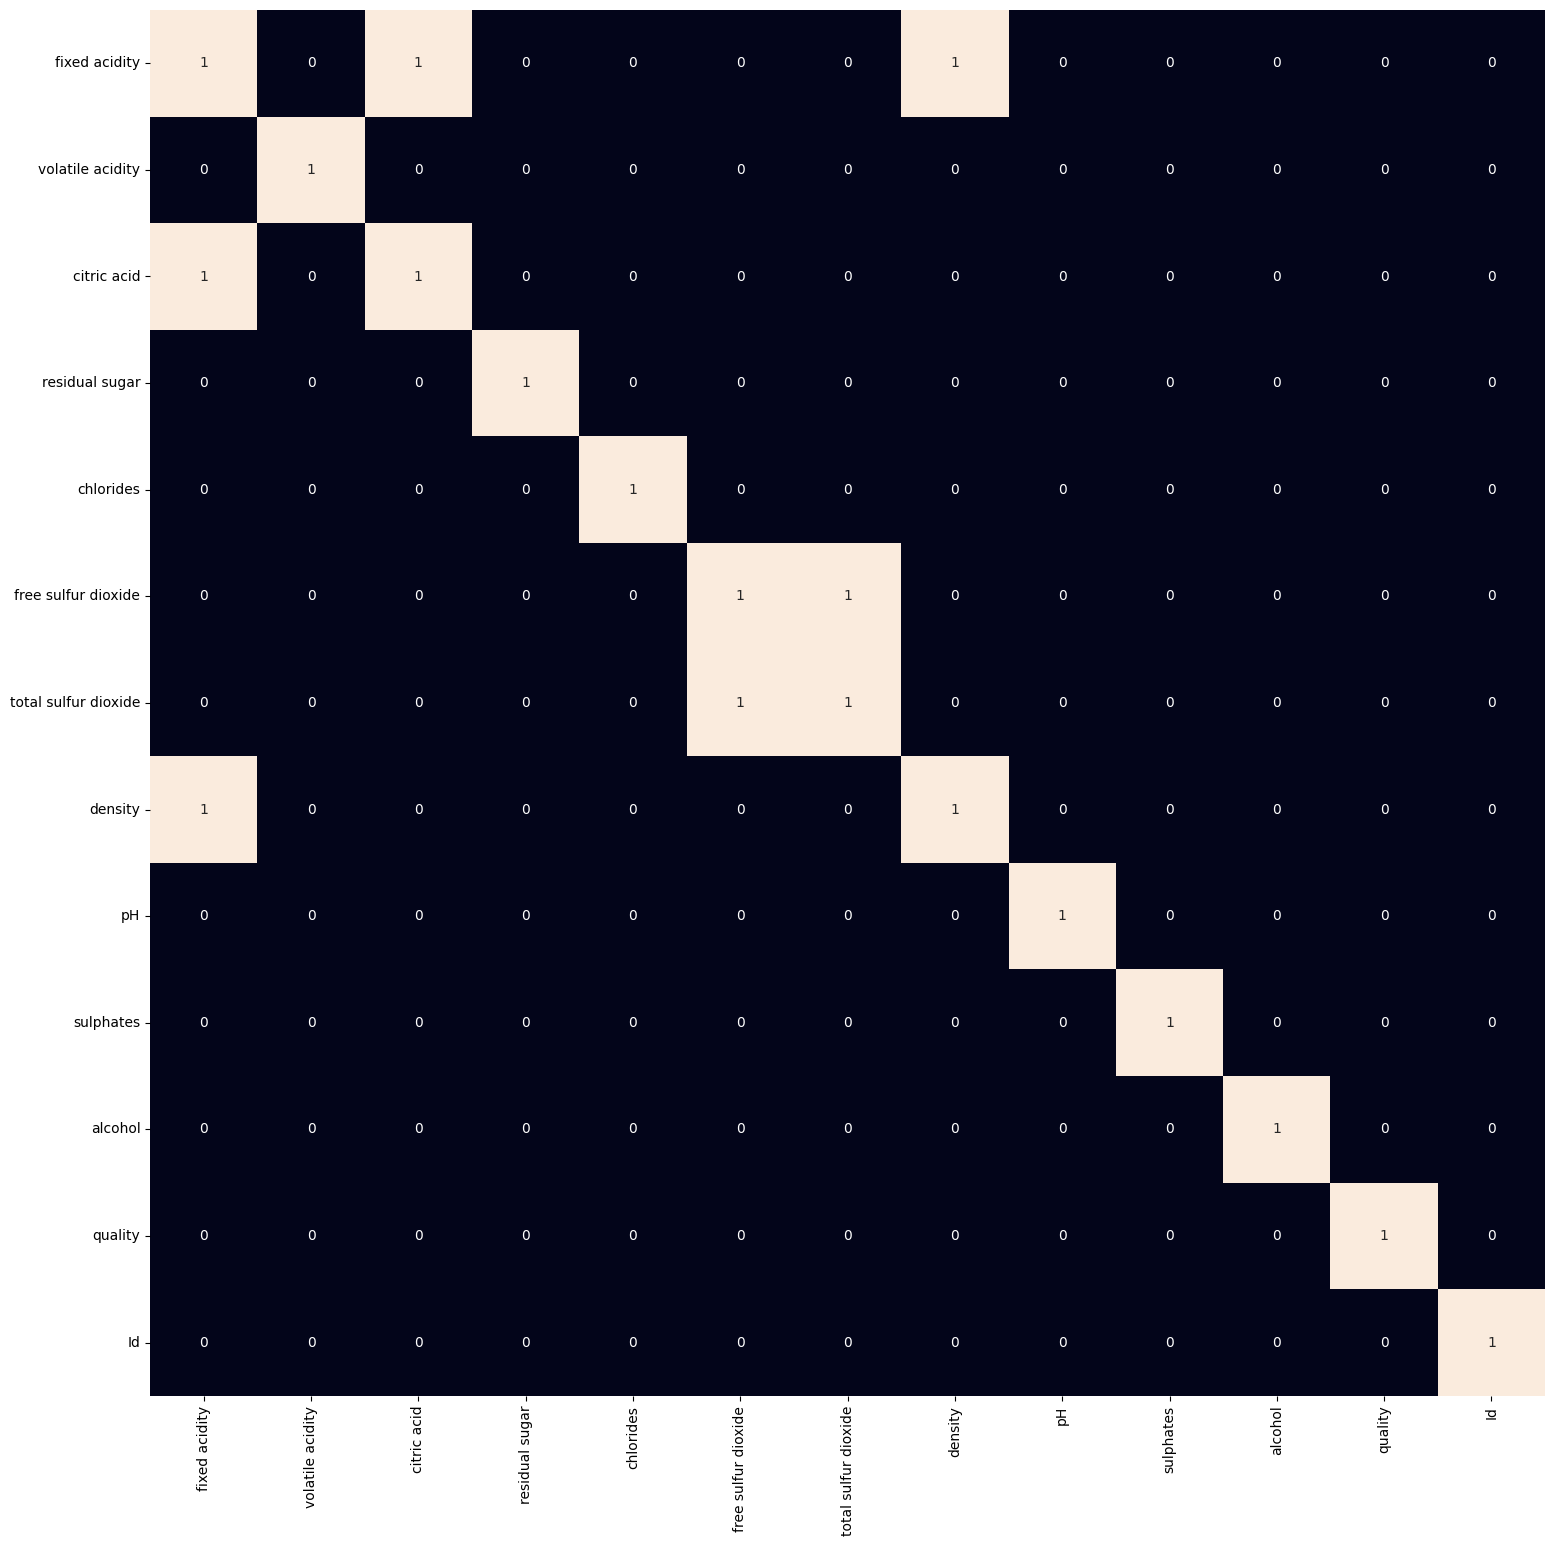

In [12]:
#removing unnecessary features to increase model performance
plt.figure(figsize=(18,18))
sns.heatmap(wine_quality_datasets.corr()>0.5,annot=True,cbar=False)
plt.show()


By the about heat map we conclude that ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them.

In [13]:
#remove thetotal sulphur dioxide
wine_quality_datasets=wine_quality_datasets.drop('total sulfur dioxide', axis=1)


# MODEL DEVELOPMENT

In [14]:
wine_quality_datasets['best quality']=[1 if x>5 else 0 for x in wine_quality_datasets.quality]

In [15]:
wine_quality_datasets.replace({'white':1,'red':0},inplace=True)

In [16]:
#splittingg the datsets into train and test =80:20
feature=wine_quality_datasets.drop(['quality','best quality'],axis=1)
target=wine_quality_datasets['best quality']
xtrain,xtest,ytrain,ytest=train_test_split(
    feature,target,test_size=0.2,random_state=40)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((914, 11), (229, 11), (914,), (229,))

In [17]:
import math
#model creation
models=LinearRegression()
#hypothesis or linear regression line creation or fitting
models.fit(xtrain,ytrain)
#predicting the values
trainpred=models.predict(xtrain)
testpred=models.predict(xtest)
#evaluating the model
print(metrics.mean_squared_error(ytest, testpred))
print(math.sqrt(metrics.mean_squared_error(ytest, testpred)))
  


0.1832496030834274
0.4280766322557532
